## バギング(bagging: bootstrap aggregating)

In [4]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
df = sns.load_dataset("titanic")
# 欠損値を落とす
df.dropna(inplace=True)
# X, y を作成
X = df.loc[:, (df.columns!="survived") & (df.columns!="alive")]
y = df["survived"]
# カテゴリ変数をエンコーディングする(決定木をsklearnで扱うためにカテゴリ変数のエンコーディングが必要)
oe = OrdinalEncoder()
oe.set_output(transform="pandas")
X = oe.fit_transform(X)
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# bagging
from sklearn.ensemble import BaggingClassifier
# デフォルトで決定木が選択される
clf = BaggingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [15]:
# 精度の検証
from sklearn.metrics import roc_auc_score
print(f"bagging AUC: {roc_auc_score(y_test, y_pred[:, 1])}")

bagging AUC: 0.8974358974358974


### アンサンブルではなく、単一の決定木の場合と比較する

In [16]:
from sklearn.tree import DecisionTreeClassifier
single_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred_tree = single_tree.predict_proba(X_test)
print(f"single tree AUC: {roc_auc_score(y_test, y_pred_tree[:, 1])}")

single tree AUC: 0.7724358974358974


# ランダムフォレストを構築する

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)
print(f"random forest AUC: {roc_auc_score(y_test, y_pred_rf[:, 1])}")

random forest AUC: 0.9447115384615384


<BarContainer object of 13 artists>

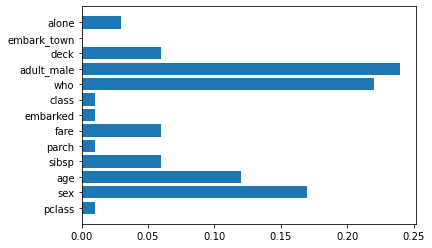

In [24]:
# モデルにおける各特徴量の重要度を以下のようにすると確認できる
import matplotlib.pyplot as plt
plt.barh(X.columns, rf.feature_importances_)

ランダムフォレストモデルにおいて各特徴量がどれだけ重要であったかが可視化された。  
`rf.estimators_`にモデルに利用した決定木インスタンスが格納されているので、そのうちの一つを描画してみる

[Text(0.5, 0.75, 'x[9] <= 0.5\ngini = 0.453\nsamples = 77\nvalue = [44, 83]'),
 Text(0.25, 0.25, 'gini = 0.195\nsamples = 37\nvalue = [7, 57]'),
 Text(0.75, 0.25, 'gini = 0.485\nsamples = 40\nvalue = [37, 26]')]

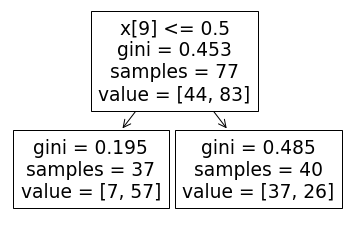

In [29]:
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0])